<a href="https://colab.research.google.com/github/AnnaMatochkina/final-certification/blob/main/%D0%B8%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B0%D1%82%D1%82%D0%B5%D1%81%D1%82%D0%B0%D1%86%D0%B8%D1%8F_%D1%84%D0%B0%D0%B9%D0%BB_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='#43a' size='6'> **Импорт и установка библиотек**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import *
from sklearn.decomposition import PCA
import gdown

# <font color='#43a' size='6'> **Загрузка данных**

In [ ]:
#https://drive.google.com/file/d/1oL-WlsecIanu1mZTsOdq3kaWJttrUeCq/view?usp=sharing
url = "https://drive.google.com/uc?id=1oL-WlsecIanu1mZTsOdq3kaWJttrUeCq"
gdown.download(url, 'reports_private_property_384.csv', quiet=True)
df = pd.read_csv('reports_private_property_384.csv')
df.head()

,ID,1110,1120,1130,1140,1150,1160,1170,1180,1190,...,2410,2421,2430,2450,2460,2400,2510,2520,2500,financial_stability
0,2543105585,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,unstable
1,2502054275,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,unstable
2,2502054282,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,131.0000,0.0000,0.0000,0.0000,0.0000,653.0000,0.0000,0.0000,653.0000,unstable
3,2502054250,0.0000,0.0000,0.0000,0.0000,629489.0000,0.0000,0.0000,3814.0000,0.0000,...,1764.0000,472.0000,-36.0000,3.0000,0.0000,9545.0000,0.0000,0.0000,9545.0000,unstable
4,2521014373,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,3.0000,0.0000,0.0000,0.0000,0.0000,10.0000,0.0000,0.0000,10.0000,unstable


## <font color='#11a' size='6'> **Описание данных**
В данных представлена информация бухгалтерского баланса и отчета о финансовых результатах организаций с кодом ОКФС = 16 - частная собственность. Единица измерения тыс. руб.

*   ID - ИНН организации
*   1110 - 2500 строки отчетности
*   financial_stability - показывает к какой группе финансовой устойчивости относится организация (stable/unstable - устойчивое/неустойчивое финанасовое положение).

Столбец 1100 "Внеоборотные активы" является суммой столбцов 1110, 1120, 1130, 1140, 1150, 1160, 1170, 1180 и 1190.

Столбец 1200 " Оборотные активы" является суммой столбцов 1210, 1220, 1230, 1240, 1250, 1260.

Столбец 1600 "Актив" является суммой столбцов 1100 и 1200.

Столбец 1300 " Капитал и резервы" является суммой столбцов 1310, 1320, 1340, 1350, 1360, 1370.

Столбец 1400 "Долгосрочные обязательства" является суммой столбцов 1410, 1420, 1430, 1440, 1450.

Столбец 1500 "Краткосрочные обязательства" является суммой столбцов 1510, 1520, 1530, 1540, 1550.

Столбец 1700 " Пассив" является суммой столбцов 1300, 1400 и 1500.

Столбец 2100 "Валовая прбыль (убыток)" является разностью столбцов  2110 и 2120.

Кроме того, вычисляемые столбцы: 2300 "Прибыль (убыток) до налогообложения", 2400 "Чистая прибыль (убыток)", 2500 "Совокупный финансовый результат".



# <font color='#11a' size='6'> **Разведочный анализ данных**

<font color='#11a' size='4'> Размер датасета

In [ ]:
memory_bytes = df.memory_usage(deep=True).sum()
memory_gb = memory_bytes / (1024 ** 3)
print(f'Размер датасета: {memory_gb:.4f} ГБ')

Размер датасета: 0.4827 ГБ


<font color='#11a' size='4'> Количество строк и столбцов

In [ ]:
rows, columns = df.shape
print(f'Количество строк: {rows}, Количество столбцов: {columns}')

Количество строк: 966253, Количество столбцов: 60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966253 entries, 0 to 966252
Data columns (total 60 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   966253 non-null  int64  
 1   1110                 966253 non-null  float64
 2   1120                 966253 non-null  float64
 3   1130                 966253 non-null  float64
 4   1140                 966253 non-null  float64
 5   1150                 966253 non-null  float64
 6   1160                 966253 non-null  float64
 7   1170                 966253 non-null  float64
 8   1180                 966253 non-null  float64
 9   1190                 966253 non-null  float64
 10  1100                 966253 non-null  float64
 11  1210                 966253 non-null  float64
 12  1220                 966253 non-null  float64
 13  1230                 966253 non-null  float64
 14  1240                 966253 non-null  float64
 15  1250             

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [ ]:
df.describe()

,ID,1110,1120,1130,1140,1150,1160,1170,1180,1190,...,2300,2410,2421,2430,2450,2460,2400,2510,2520,2500
count,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,...,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00,966253.00
mean,5237688598.37,2680.16,208.65,356.27,134.54,35966.73,2569.96,67942.44,2161.40,4664.47,...,8588.90,1810.46,154.63,-187.31,322.09,-256.84,6666.86,222.84,-20.83,6864.97
std,2348945595.94,979999.30,42560.90,79387.42,27547.32,1900301.97,255587.46,26465953.77,191987.04,283002.18,...,1281164.16,182009.37,68564.88,34199.54,33503.30,52201.67,1102875.01,33665.37,11303.66,1104719.14
min,101000021.00,-10810.00,-66000.00,0.00,-22.00,-120623.00,-32917.00,-4624.00,-186182.00,-230959.00,...,-390790903.00,-2925132.00,-17684818.00,-20242630.00,-8654003.00,-41478097.00,-390792969.00,-3597260.00,-6418671.00,-390792969.00
25%,3327117620.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5503237703.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,28.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00,11.00
75%,7455030210.00,0.00,0.00,0.00,0.00,321.00,0.00,0.00,0.00,0.00,...,664.00,60.00,0.00,0.00,0.00,0.00,507.00,0.00,0.00,497.00
max,9909502910.00,736000000.00,36310537.00,57899221.00,9552069.00,866873313.00,192083602.00,25710120000.00,169347000.00,146248384.00,...,1008390471.00,161206175.00,38832669.00,5252563.00,12897140.00,5949629.00,827641293.00,18713757.00,7533057.00,828804656.00


In [ ]:
# Проверка на пропуски
df.isna().sum()

,0
ID,0
1110,0
1120,0
1130,0
1140,0
1150,0
1160,0
1170,0
1180,0
1190,0


##<font color='#11a' size='4'> Графики

In [ ]:
# Построим графики для укрупненных показателей
num_features = '1100', '1200', '1300', '1400', '1500', '1600' , '2100', '2500'

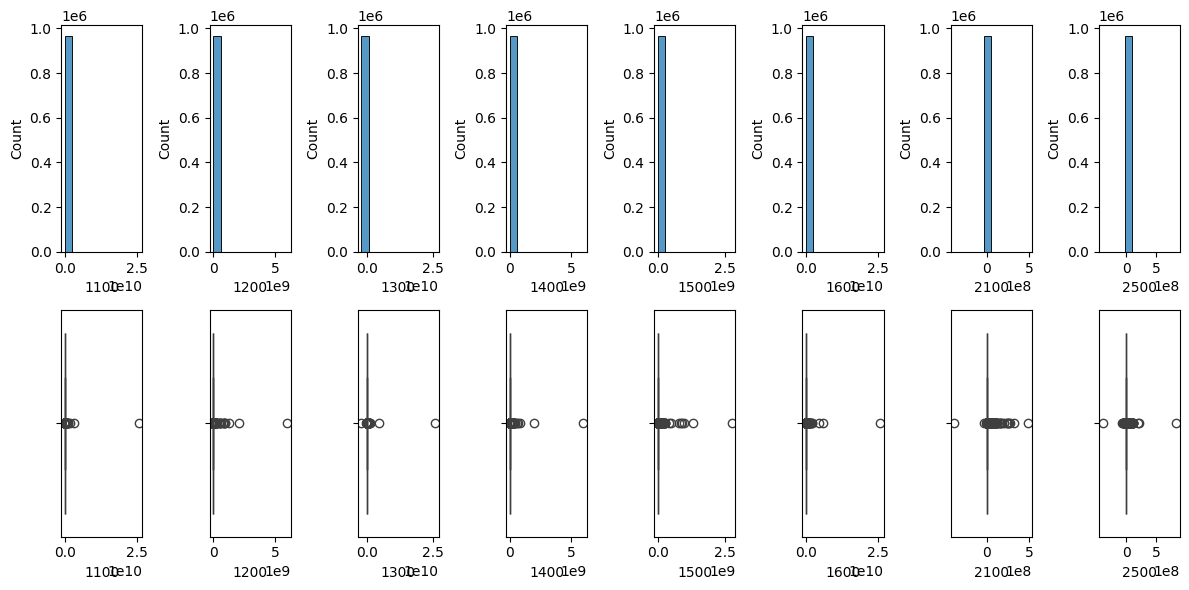

In [ ]:
# Гистограммы
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, len(num_features), i)
    sns.histplot(df[col], bins=10)
# Box plot
for i, col in enumerate(num_features, 1):
    plt.subplot(2, len(num_features), i + len(num_features))
    sns.boxplot(x=df[col])

plt.tight_layout()
plt.show()

По всем показателям наблюдаются выбросы, но так как каждый показатель отчетности может оказать влияние на финансовое положение, замена значений на среднее или медиану кажется недопустимой. В данных представлены организации разного размера. **Сузим выборку до межквартильного интервала по столбцу 1600 - Валюта баланса.**

In [ ]:
# Сузим выборку до межквартильного интервала по столбцу 1600 - Валюта баланса.
q_first = df['1600'].quantile(0.25)
q_third = df['1600'].quantile(0.75)
iqr = q_third - q_first
df_iqr = df[(df['1600'] >= (q_first - 1.5 * iqr)) & (df['1600'] <= (q_third + 1.5 * iqr))]

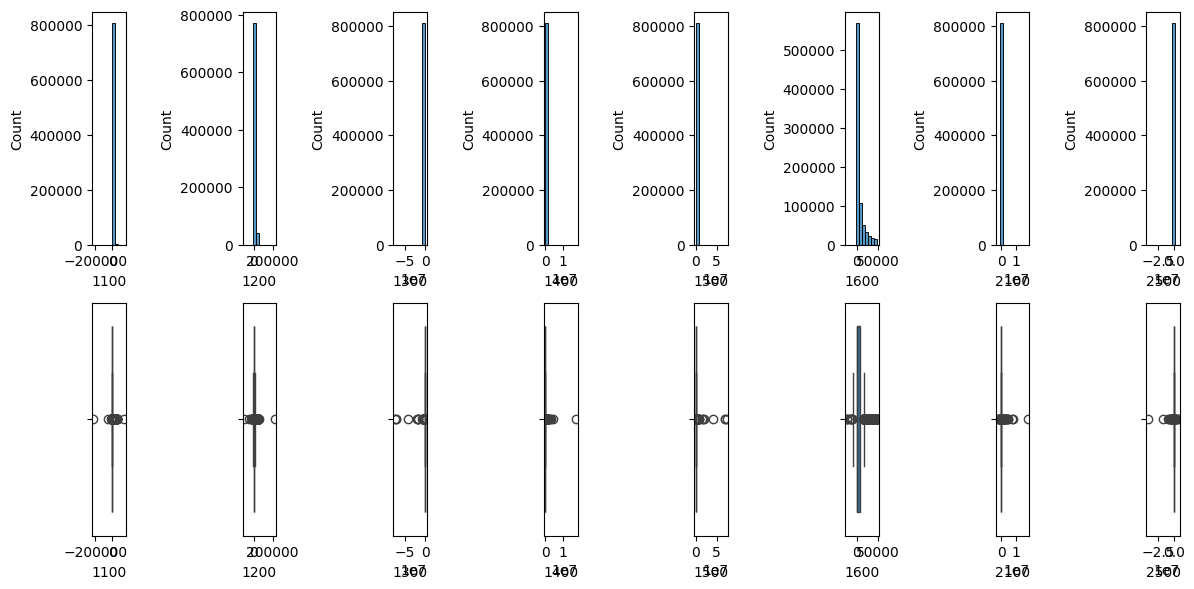

In [ ]:
# Гистограммы
plt.figure(figsize=(12, 6))
for i, col in enumerate(num_features, 1):
    plt.subplot(2, len(num_features), i)
    sns.histplot(df_iqr[col], bins=10)
# Box plot
for i, col in enumerate(num_features, 1):
    plt.subplot(2, len(num_features), i + len(num_features))
    sns.boxplot(x=df_iqr[col])

plt.tight_layout()
plt.show()

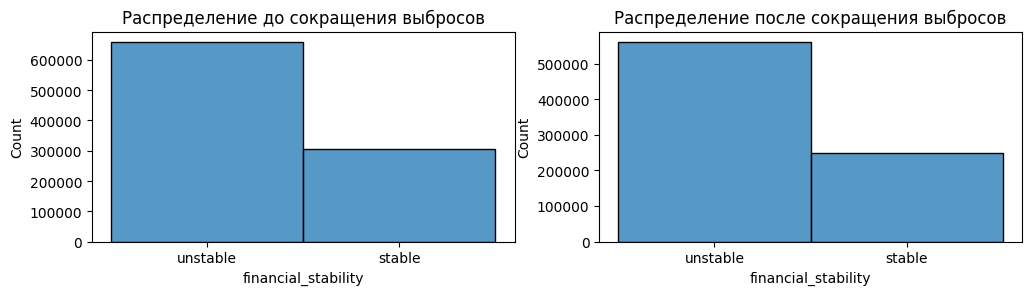

In [ ]:
# Гистограммы
plt.figure(figsize=(12,6))
plt.subplot(2, 2, 1)
sns.histplot(df['financial_stability'], bins=2)
plt.title(f'Распределение до сокращения выбросов')

plt.subplot(2, 2, 2)
sns.histplot(df_iqr['financial_stability'], bins=2)
plt.title(f'Распределение после сокращения выбросов')
plt.show()

Сокращение выборки значительно не повлияло на распределение по целевому показателю.

# <font color='#11a' size='4'> Обработка категориальных значений

In [ ]:
# Обработка целевого признака
df_iqr['fin_stab_encoded'] = np.where(df_iqr['financial_stability'] == 'unstable', 0, 1)

/tmp/ipython-input-4228979647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr['fin_stab_encoded'] = np.where(df_iqr['financial_stability'] == 'unstable', 0, 1)


In [ ]:
df_iqr.head(5)

,ID,1110,1120,1130,1140,1150,1160,1170,1180,1190,...,2421,2430,2450,2460,2400,2510,2520,2500,financial_stability,fin_stab_encoded
0,2543105585,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,unstable,0
1,2502054275,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,unstable,0
4,2521014373,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,10.00,0.00,0.00,10.00,unstable,0
5,2301091076,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,1922.00,0.00,0.00,0.00,stable,1
6,2308227978,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,-468.00,0.00,0.00,-468.00,unstable,0


In [ ]:
df_iqr.drop('financial_stability', axis = 1, inplace = True)

/tmp/ipython-input-3133309960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iqr.drop('financial_stability', axis = 1, inplace = True)


In [ ]:
df_iqr.head(5)

,ID,1110,1120,1130,1140,1150,1160,1170,1180,1190,...,2410,2421,2430,2450,2460,2400,2510,2520,2500,fin_stab_encoded
0,2543105585,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
1,2502054275,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
4,2521014373,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.00,0.00,0.00,0.00,0.00,10.00,0.00,0.00,10.00,0
5,2301091076,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,158.00,0.00,0.00,0.00,0.00,1922.00,0.00,0.00,0.00,1
6,2308227978,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,18.00,0.00,0.00,0.00,0.00,-468.00,0.00,0.00,-468.00,0


Удалим столбцы, содержацие суммы других столбцов, для данных, отражающих информацию бухгалтерского баланса,.

Для данных, отражающих информацию отчета о финансовых результатах, наоборот, оставим подобные столбцы, так как они применяются для расчета коэффициентов при анализе финансовой устойчивости.

In [ ]:
df_study = df_iqr.drop('1100', axis=1)
df_study = df_study.drop('1200', axis=1)
df_study = df_study.drop('1300', axis=1)
df_study = df_study.drop('1400', axis=1)
df_study = df_study.drop('1500', axis=1)
df_study = df_study.drop('1600', axis=1)
df_study = df_study.drop('1700', axis=1)
df_study = df_study.drop('ID', axis=1)
df_study = df_study.drop('2210', axis=1)
df_study = df_study.drop('2220', axis=1)
df_study = df_study.drop('2310', axis=1)
df_study = df_study.drop('2320', axis=1)
df_study = df_study.drop('2330', axis=1)
df_study = df_study.drop('2340', axis=1)
df_study = df_study.drop('2350', axis=1)
df_study = df_study.drop('2410', axis=1)
df_study = df_study.drop('2421', axis=1)
df_study = df_study.drop('2430', axis=1)
df_study = df_study.drop('2450', axis=1)
df_study = df_study.drop('2460', axis=1)
df_study = df_study.drop('2510', axis=1)
df_study = df_study.drop('2520', axis=1)

In [ ]:
df_study = df_study.reset_index()

In [ ]:
df_study = df_study.drop('index', axis=1)

In [ ]:
df_study

,1110,1120,1130,1140,1150,1160,1170,1180,1190,1210,...,1540,1550,2110,2120,2100,2200,2300,2400,2500,fin_stab_encoded
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
1,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0
2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1309.0000,1280.0000,29.0000,29.0000,13.0000,10.0000,10.0000,0
3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,660.0000,...,0.0000,0.0000,5350.0000,3252.0000,2098.0000,2098.0000,2080.0000,1922.0000,0.0000,1
4,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,67.0000,624.0000,263.0000,361.0000,-450.0000,-450.0000,-468.0000,-468.0000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810535,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,148.0000,...,0.0000,0.0000,202.0000,0.0000,202.0000,148.0000,148.0000,148.0000,148.0000,0
810536,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,652.0000,...,0.0000,0.0000,626.0000,949.0000,-323.0000,-323.0000,-323.0000,-323.0000,-323.0000,1
810537,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,1.0000,0.0000,0.0000,0.0000,-97.0000,0.0000,0.0000,0.0000,0
810538,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,1263.0000,0.0000,1263.0000,844.0000,35.0000,35.0000,35.0000,0


# <font color='#11a' size='6'> **Построение моделей**

In [ ]:
# Извлечение столбцов с именами от '1110' до '2500'
X_df = df_study.loc[:, '1110':'2500']

In [ ]:
# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_df)

In [ ]:
y_df = df_study.loc[:, 'fin_stab_encoded']
# Преобразование в массив
y = y_df.to_numpy()

In [ ]:
# Разбиение выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

<font color='#11a' size='4'> Понижение размерности методом PCA



In [ ]:
# Для оптимизации времени вычислений установим n_components = 0.50. При n_components = 0.90 количество признаков составило 29.
pca = PCA(n_components=0.50, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
X_pca.shape

(810540, 13)

In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

<font color='#11a' size='4'> Метрики

In [ ]:
# Расчет метрик
def calc_metrics(model, x, y):
  pred = model.predict(x)
  accuracy = model.score(x, y)
  precision = precision_score(y, pred)
  recall = recall_score(y, pred)
  f1 = f1_score(y, pred)
  metrics = pd.Series([accuracy, precision, recall, f1])
  return metrics

In [ ]:
# Создание DataFrame для сравнения моделей
df_result = pd.DataFrame()
df_result['metrics'] = ['accuracy', 'precision', 'recall', 'f1', 'parameters']

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)

## <font color='#11a' size='4'> Построение модели **Logistic Regression**


In [ ]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
# Расчет метрик
df_result['lr_train'] = calc_metrics(lr, X_train, y_train)
df_result['lr_test'] = calc_metrics(lr, X_test, y_test)
df_result

,metrics,lr_train,lr_test
0,accuracy,0.7978,0.7965
1,precision,0.7101,0.7085
2,recall,0.5749,0.5726
3,f1,0.6354,0.6334
4,parameters,NaN,NaN


<font color='#11a' size='4'> Вычисления на данных с применением метода РСА

In [ ]:
lr_pca = LogisticRegression(class_weight='balanced')
lr_pca.fit(X_train_pca, y_train_pca)

LogisticRegression(class_weight='balanced')

In [ ]:
# Расчет метрик
df_result['lr_train_pca'] = calc_metrics(lr_pca, X_train_pca, y_train_pca)
df_result['lr_test_pca'] = calc_metrics(lr_pca, X_test_pca, y_test_pca)
df_result

,metrics,lr_train,lr_test,lr_train_pca,lr_test_pca
0,accuracy,0.7978,0.7965,0.7831,0.7825
1,precision,0.7101,0.7085,0.6831,0.6838
2,recall,0.5749,0.5726,0.5448,0.5424
3,f1,0.6354,0.6334,0.6062,0.6049
4,parameters,NaN,NaN,NaN,NaN


Точность вычисления на выборке с понижением размерности методом PCA ниже, чем без применения данного метода.

## <font color='#11a' size='4'> Построение модели **KNeighborsClassifier**

In [ ]:
knn_pca = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_pca.fit(X_train_pca, y_train_pca)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [ ]:
# Расчет метрик
df_result['knn_train_pca'] = calc_metrics(knn_pca, X_train_pca, y_train_pca)

In [ ]:
# Расчет метрик
df_result['knn_test_pca'] = calc_metrics(knn_pca, X_test_pca, y_test_pca)

In [ ]:
df_result['knn_train_pca'] = df_result['knn_train_pca'].astype(object)
df_result.at[4, 'knn_train_pca'] = 'n3 manhattan'
df_result

,metrics,lr_train,lr_test,lr_train_pca,lr_test_pca,knn_train_pca,knn_test_pca
0,accuracy,0.7978,0.7965,0.7831,0.7825,0.9036,0.8256
1,precision,0.7101,0.7085,0.6831,0.6838,0.8533,0.7244
2,recall,0.5749,0.5726,0.5448,0.5424,0.8277,0.6973
3,f1,0.6354,0.6334,0.6062,0.6049,0.8403,0.7106
4,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN


## <font color='#11a' size='4'> Построение модели **Decision Tree**


In [ ]:
# Подбор гиперпараметров
param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 5, 10]
}

dtr = DecisionTreeClassifier(random_state = 42)
grid_search = GridSearchCV(dtr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print(f"Лучшие параметры: {grid_search.best_params_}")

Лучшие параметры: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
# Расчет метрик
df_result['dtr_train'] = calc_metrics(grid_search.best_estimator_, X_train, y_train)
df_result['dtr_test'] = calc_metrics(grid_search.best_estimator_, X_test, y_test)

In [ ]:
df_result['dtr_train'] = df_result['dtr_train'].astype(object)
df_result.at[4, 'dtr_train'] = 'd20 l5 s2'
df_result

,metrics,lr_train,lr_test,lr_train_pca,lr_test_pca,knn_train_pca,knn_test_pca,dtr_train,dtr_test
0,accuracy,0.7978,0.7965,0.7831,0.7825,0.9036,0.8256,0.9861,0.9668
1,precision,0.7101,0.7085,0.6831,0.6838,0.8533,0.7244,0.9781,0.9470
2,recall,0.5749,0.5726,0.5448,0.5424,0.8277,0.6973,0.9764,0.9448
3,f1,0.6354,0.6334,0.6062,0.6049,0.8403,0.7106,0.9773,0.9459
4,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN,d20 l5 s2,NaN


Построим модель с гиперпараметрами, подобранными GridSearchCV, на данных с понижением размерности методом РСА

In [ ]:
dtr_pca = DecisionTreeClassifier(random_state = 42, max_depth =20, min_samples_split = 5, min_samples_leaf = 2)
dtr_pca.fit(X_train_pca, y_train_pca)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [ ]:
# Расчет метрик
df_result['dtr_train_pca'] = calc_metrics(dtr_pca, X_train_pca, y_train_pca)
df_result['dtr_test_pca'] = calc_metrics(dtr_pca, X_test_pca, y_test_pca)

In [ ]:
df_result['dtr_train_pca'] = df_result['dtr_train_pca'].astype(object)
df_result.at[4, 'dtr_train_pca'] = 'd20 l5 s2'
df_result

,metrics,lr_train,lr_test,lr_train_pca,lr_test_pca,knn_train_pca,knn_test_pca,dtr_train,dtr_test,dtr_train_pca,dtr_test_pca
0,accuracy,0.7978,0.7965,0.7831,0.7825,0.9036,0.8256,0.9861,0.9668,0.9423,0.8332
1,precision,0.7101,0.7085,0.6831,0.6838,0.8533,0.7244,0.9781,0.9470,0.9097,0.7309
2,recall,0.5749,0.5726,0.5448,0.5424,0.8277,0.6973,0.9764,0.9448,0.9011,0.7227
3,f1,0.6354,0.6334,0.6062,0.6049,0.8403,0.7106,0.9773,0.9459,0.9054,0.7268
4,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN,d20 l5 s2,NaN,d20 l5 s2,NaN


Дерево решений, построенное без применения РСА, показывает высокую точность прогноза.

## <font color='#11a' size='4'> Построение модели **Random Forest**


In [ ]:
# DataFrame для сравнения метрик по моделям "Случайный лес"
df_result_rf = pd.DataFrame()
df_result_rf['metrics'] = ['accuracy', 'precision', 'recall', 'f1', 'parameters']

In [ ]:
rfc_fist = RandomForestClassifier(random_state = 42, max_depth = 20, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 100)
rfc_fist.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [ ]:
# Расчет метрик
df_result_rf['rfc_train_first'] = calc_metrics(rfc_fist, X_train, y_train)
df_result_rf['rfc_test_first'] = calc_metrics(rfc_fist, X_test, y_test)

In [ ]:
df_result_rf['rfc_train_first'] = df_result_rf['rfc_train_first'].astype(object)
df_result_rf.at[4, 'rfc_train_first'] = 'd20 l5 s2 n100'
df_result_rf

,metrics,rfc_train_first,rfc_test_first
0,accuracy,0.9836,0.9675
1,precision,0.9698,0.9454
2,recall,0.9770,0.9491
3,f1,0.9734,0.9472
4,parameters,d20 l5 s2 n100,NaN


Точность модели выше предыдущих, но наблюдается переобучение. Попробуем сделать более точной, установим n_estimators = 200

In [ ]:
rfc_second = RandomForestClassifier(random_state = 42, max_depth = 20, min_samples_leaf = 5, min_samples_split = 2, n_estimators = 200)
rfc_second.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [ ]:
# Расчет метрик
df_result_rf['rfc_train_second'] = calc_metrics(rfc_second, X_train, y_train)
df_result_rf['rfc_test_second'] = calc_metrics(rfc_second, X_test, y_test)

In [ ]:
df_result_rf['rfc_train_second'] = df_result_rf['rfc_train_second'].astype(object)
df_result_rf.at[4, 'rfc_train_second'] = 'd20 l5 s2 n200'
df_result_rf

,metrics,rfc_train_first,rfc_test_first,rfc_train_second,rfc_test_second
0,accuracy,0.9836,0.9675,0.9840,0.9679
1,precision,0.9698,0.9454,0.9707,0.9463
2,recall,0.9770,0.9491,0.9773,0.9495
3,f1,0.9734,0.9472,0.9740,0.9479
4,parameters,d20 l5 s2 n100,NaN,d20 l5 s2 n200,NaN


С повышением n_estimators до 200 произошло увеличение точности только в 4 знаке после запятой, разница между показателями на тренировочной и тестовой выборке увеличилась, поэтому оставим n_estimators = 100. Установим min_samples_leaf = 2.

In [ ]:
rfc_third = RandomForestClassifier(random_state = 42, max_depth = 20, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100)
rfc_third.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, random_state=42)

In [ ]:
# Расчет метрик
df_result_rf['rfc_train_third'] = calc_metrics(rfc_third, X_train, y_train)
df_result_rf['rfc_test_third'] = calc_metrics(rfc_third, X_test, y_test)

In [ ]:
df_result_rf['rfc_train_third'] = df_result_rf['rfc_train_third'].astype(object)
df_result_rf.at[4, 'rfc_train_third'] = 'd20 l2 s2 n100'
df_result_rf

,metrics,rfc_train_first,rfc_test_first,rfc_train_second,rfc_test_second,rfc_train_third,rfc_test_third
0,accuracy,0.9836,0.9675,0.9840,0.9679,0.9898,0.9690
1,precision,0.9698,0.9454,0.9707,0.9463,0.9781,0.9471
2,recall,0.9770,0.9491,0.9773,0.9495,0.9887,0.9523
3,f1,0.9734,0.9472,0.9740,0.9479,0.9834,0.9497
4,parameters,d20 l5 s2 n100,NaN,d20 l5 s2 n200,NaN,d20 l2 s2 n100,NaN


При уменьшении min_samples_leaf до 2 увеличилась точность модели, но при этом модель остается переобученной. Попробуем изменить глубину и установим значение max_depth = 10.

In [ ]:
rfc_fourth = RandomForestClassifier(random_state = 42, max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 100)
rfc_fourth.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, random_state=42)

In [ ]:
# Расчет метрик
df_result_rf['rfc_train_fourth'] = calc_metrics(rfc_fourth, X_train, y_train)
df_result_rf['rfc_test_fourth'] = calc_metrics(rfc_fourth, X_test, y_test)

In [ ]:
df_result_rf['rfc_train_fourth'] = df_result_rf['rfc_train_fourth'].astype(object)
df_result_rf.at[4, 'rfc_train_fourth'] = 'd10 l2 s2 n100'
df_result_rf

,metrics,rfc_train_first,rfc_test_first,rfc_train_second,rfc_test_second,rfc_train_third,rfc_test_third,rfc_train_fourth,rfc_test_fourth
0,accuracy,0.9836,0.9675,0.9840,0.9679,0.9898,0.9690,0.9362,0.9340
1,precision,0.9698,0.9454,0.9707,0.9463,0.9781,0.9471,0.8788,0.8769
2,recall,0.9770,0.9491,0.9773,0.9495,0.9887,0.9523,0.9186,0.9131
3,f1,0.9734,0.9472,0.9740,0.9479,0.9834,0.9497,0.8983,0.8946
4,parameters,d20 l5 s2 n100,NaN,d20 l5 s2 n200,NaN,d20 l2 s2 n100,NaN,d10 l2 s2 n100,NaN


Лучшие результаты показала модель с гиперпараметрами max_depth=20, min_samples_leaf=2, min_samples_split = 2, n_estimators = 100.

In [ ]:
# Добавление к результатам моделей лучшего варианта модели случайного леса
df_result['rfr_train'] = df_result_rf['rfc_train_third']
df_result['rfr_test'] = df_result_rf['rfc_test_third']
df_result['rfr_train'] = df_result['rfr_train'].astype(object)
df_result.at[4, 'rfr_train'] = 'd20 l2 s2 n100'
df_result

,metrics,lr_train,lr_test,lr_train_pca,lr_test_pca,knn_train_pca,knn_test_pca,dtr_train,dtr_test,dtr_train_pca,dtr_test_pca,rfr_train,rfr_test
0,accuracy,0.7978,0.7965,0.7831,0.7825,0.9036,0.8256,0.9861,0.9668,0.9423,0.8332,0.9898,0.9690
1,precision,0.7101,0.7085,0.6831,0.6838,0.8533,0.7244,0.9781,0.9470,0.9097,0.7309,0.9781,0.9471
2,recall,0.5749,0.5726,0.5448,0.5424,0.8277,0.6973,0.9764,0.9448,0.9011,0.7227,0.9887,0.9523
3,f1,0.6354,0.6334,0.6062,0.6049,0.8403,0.7106,0.9773,0.9459,0.9054,0.7268,0.9834,0.9497
4,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN,d20 l5 s2,NaN,d20 l5 s2,NaN,d20 l2 s2 n100,NaN


## <font color='#11a' size='4'> Построение модели Бустинг

In [ ]:
# Разбиение выборки
X_df_train, X_df_test, y_df_train, y_df_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

In [ ]:
param_grid = {
    'learning_rate': [0.1],
    'max_depth': [10, 20],
    'num_leaves': [2, 5, 10],
    'n_estimators': [100, 200]
}
lgbust = lgb.LGBMClassifier(random_state = 42)
grid_search = GridSearchCV(lgbust, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_df_train, y_df_train)
print(f"Лучшие параметры: {grid_search.best_params_}")

[LightGBM] [Info] Number of positive: 158967, number of negative: 359778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.263979 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8557
[LightGBM] [Info] Number of data points in the train set: 518745, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.306445 -> initscore=-0.816791
[LightGBM] [Info] Start training from score -0.816791
[LightGBM] [Info] Number of positive: 158967, number of negative: 359778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.159824 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 8574
[LightGBM] [Info] Number of data points in the train set: 518745, number of used features: 37
[LightGBM] [

In [ ]:
# Расчет метрик
df_result['lgbust_train'] = calc_metrics(grid_search.best_estimator_, X_df_train, y_df_train)
df_result['lgbust_test'] = calc_metrics(grid_search.best_estimator_, X_df_test, y_df_test)

In [ ]:
df_result['lgbust_train'] = df_result['lgbust_train'].astype(object)
df_result.at[4, 'lgbust_train'] = 'lr 0,1 d10 l10 n200'
df_result

,metrics,lr_train,lr_test,lr_train_pca,lr_test_pca,knn_train_pca,knn_test_pca,dtr_train,dtr_test,dtr_train_pca,dtr_test_pca,rfr_train,rfr_test,lgbust_train,lgbust_test
0,accuracy,0.7978,0.7965,0.7831,0.7825,0.9036,0.8256,0.9861,0.9668,0.9423,0.8332,0.9898,0.9690,0.9666,0.9657
1,precision,0.7101,0.7085,0.6831,0.6838,0.8533,0.7244,0.9781,0.9470,0.9097,0.7309,0.9781,0.9471,0.9348,0.9353
2,recall,0.5749,0.5726,0.5448,0.5424,0.8277,0.6973,0.9764,0.9448,0.9011,0.7227,0.9887,0.9523,0.9577,0.9544
3,f1,0.6354,0.6334,0.6062,0.6049,0.8403,0.7106,0.9773,0.9459,0.9054,0.7268,0.9834,0.9497,0.9461,0.9447
4,parameters,NaN,NaN,NaN,NaN,n3 manhattan,NaN,d20 l5 s2,NaN,d20 l5 s2,NaN,d20 l2 s2 n100,NaN,"lr 0,1 d10 l10 n200",NaN


## <font color='#11a' size='6'> **Вывод**

### <font color='#11a642' size='4'>

Модель логистической регрессии показала худшие результаты (в том числе и при применении понижения размерности).

Метод ближайших соседей дает более точный результат, по сравнению с предыдущей моделью, точность составила 0.825616 на тестовых данных.

Модель "Дерево решений" при подборе гиперпараметров предстказывает с точностью 0.966825 на тестовых данных без применения методов понижения размерности. (max_depth=20, min_samples_leaf=5, min_samples_split=2).

Модель случайного леса при подборе гиперпараметров показала лучший результат на тестовых данных 0.969008 (max_depth=20, min_samples_leaf=5, min_samples_split=10, n_estimators=100), она также преобучена.

Модель LightGBM при подборе гиперпараметров показала лучший результат при learning_rate=0.1, max_depth=10, n_estimators=200, num_leaves=10, она менее преобучена.

На основе вышеизложенного, стоит выбрать модель случайного леса. Она демонстрирует более высокие результаты по точности, количеству ложноположительных результатов и метрики f1.

